# Homework 2

#### Package Imports

In [38]:
import pandas as pd 
import numpy as np
from scipy import spatial
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import pydot
import operator
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

___

## Problem 1 

K-Nearest-Neighbor (KNN) classification on Newsgroups Dataset: newsgroups.zip 

For this problem you will use a subset of the 20 Newsgroup data set. The full data set contains 20,000 newsgroup
documents, partitioned (nearly) evenly across 20 different newsgroups and has been often used for experiments in
text applications of machine learning techniques, such as text classification and text clustering (see the description
of the full dataset). The assignment data set contains a subset of 1000 documents and a vocabulary of terms.
Each document belongs to one of two classes Hockey (class label 1) and Microsoft Windows (class label 0). The
data has already been split (80%, 20%) into training and test data. The class labels for the training and test data are
also provided in separate files. The training and test data contain a row for each term in the vocabulary and a
column for each document. The values in the table represent raw term frequencies. The data has already been
preprocessed to extract terms, remove stop words and perform stemming (so, the vocabulary contains stems not
full terms). Please be sure to read the readme.txt file in the distribution. 

Your tasks in this problem are the following Note: for this problem you should not use scikit-learn for
classification, but create your own KNN classifer. You may use Pandas, NumPy, standard Python
libraries, and Matplotlib.

In [2]:
#Import data
train_features = np.loadtxt('https://raw.githubusercontent.com/PixarJunkie/dsc-478-programming-ml-apps/master/data/news-data/trainMatrixModified.txt')
train_target = np.loadtxt('https://raw.githubusercontent.com/PixarJunkie/dsc-478-programming-ml-apps/master/data/news-data/trainClasses.txt')
test_features = np.loadtxt('https://raw.githubusercontent.com/PixarJunkie/dsc-478-programming-ml-apps/master/data/news-data/testMatrixModified.txt')
test_target = np.loadtxt('https://raw.githubusercontent.com/PixarJunkie/dsc-478-programming-ml-apps/master/data/news-data/testClasses.txt')
mod_terms = pd.read_csv('https://raw.githubusercontent.com/PixarJunkie/dsc-478-programming-ml-apps/master/data/news-data/modifiedterms.txt', delimiter = '\t', header = None)

___

### Problem 1a  

Create your own KNN classifier function. Your classifier should allow as input the training data matrix,
the training labels, the instance to be classified, the value of K, and should return the predicted class for
the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as
Cosine Similarity. You may create two separate classifiers, or add this capability as a parameter for the
classifier function.

In [45]:
#KNN function
def knn(X_train, instance, terms, k, similarity):
    #Use cosine distance if similarity = cosine
    if similarity == 'cosine':
        D_norm = np.array([np.linalg.norm(X_train[i]) for i in range(len(X_train))])
        x_norm = np.linalg.norm(instance)
        sims = np.dot(X_train, instance) / (D_norm * x_norm)
        dists = 1 - sims
    #Use euclidean distance if similarity = euclidean     
    elif similarity == 'euclidean':
        #From class
        dists = np.sqrt(((X_train - instance)**2).sum(axis = 1))
    #Get sort dists and get indicies
    idx = np.argsort(dists)
    
    clslbl = (terms[1][idx[:k]])
    if (clslbl == 1).sum() == (clslbl == 0).sum():
        pred_cls = '?'
    elif (clslbl == 1).sum() > (clslbl == 0).sum():
        pred_cls = 1
    else:
        pred_cls = 0

    top_K_neighbors = train[idx[:k]]

    return pred_cls, top_K_neighbors

In [46]:
test_1 = knn(train_features, train_features[2], mod_terms, 5, 'cosine')

KeyError: 1

___

#### Problem 1b 
Create a function to compute the classification accuracy over the test data set (ratio of correct
predictions to the number of test instances). This function will call the classifier function in part a on all
the test instances and in each case compares the actual test class label to the predicted class label.

In [ ]:
#Accuracy funtion
def knn_acc(y_test)

___

## Problem 2 

Classification using scikit-learn Dataset: bank_data.csv 

For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine
learning module, as well as with some of its preprocessing and model evaluation capabilities. Note: This module
is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will
need to first obtain and install it. You will work with a modified subset of a real data set of customers for a bank.
This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row
containing the attribute names. 

___

### Problem 2a 
Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikitlearn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be
used for training and testing. You will need to convert the selected dataset into the Standard
Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form).
Finally, you need to split the transformed data into training and test sets (using 80%-
20% randomized split). Review Ipython Notebook examples from Week 4 for different ways to perform
these tasks.

In [6]:
#Import data
url = 'https://raw.githubusercontent.com/PixarJunkie/dsc-478-programming-ml-apps/master/data/bank-data/bank_data.csv'
data = pd.read_csv(url)

#Remove id colulmn
data.drop(columns = 'id', axis = 1, inplace = True)

#Remove pep as target variable
y = data['pep']

#Convert categorical columns to dummy variables
data_trans = pd.get_dummies(data[['gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage']])
data_trans = pd.concat([data, data_trans], axis = 1)
data_trans.drop(columns = ['gender', 'region', 'married', 'car', 'savings_acct', 'current_acct', 'mortgage', 'pep'], axis = 1, inplace = True)
data_trans.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [7]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(data_trans, y, test_size = 0.20, random_state = 23)
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (480, 19)
X_test shape: (120, 19)
y_train shape: (480,)
y_test shape: (120,)


___

### Problem 2b 
Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you should first normalize
the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1).
Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also,
compute the average accuracy score. Experiment with different values of K and the weight parameter
(i.e., with or without distance weighting) for KNN to see if you can improve accuracy (you do not need to
provide the details of all of your experimentation, but provide a short discussion on what parameters
worked best as well as your final results).

In [8]:
#Create copy of data_trans
data_knn = data_trans

#Create numpy array for age, income, and children
data_norm_vals = data_trans[['age', 'income', 'children']].values

#Create min max scalar
min_max = preprocessing.MinMaxScaler()

#Fit scalar to numpy array
norm_vals = min_max.fit_transform(data_norm_vals)

#Create dataframe of normalized values
norm_df = pd.DataFrame(norm_vals, columns = ['age', 'income', 'children'])

#Replace age, income, and children in original dataframe
data_knn.age = norm_df.age
data_knn.income = norm_df.income
data_knn.children = norm_df.children
data_knn.head()

#Train test split with normalized columns
#Train test split
X_train, X_test, y_train, y_test = train_test_split(data_knn, y, test_size = 0.20, random_state = 23)
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (480, 19)
X_test shape: (120, 19)
y_train shape: (480,)
y_test shape: (120,)


In [9]:
#KNN model and param grid
k_vals = list(range(1, 10))
knn = KNeighborsClassifier()
params = {'n_neighbors': k_vals, 'weights': ['uniform', 'distance']}

#KNN with gridsearch
knn_model = GridSearchCV(knn, param_grid = params, scoring = 'accuracy')

#Fit model to training set
knn_model.fit(X_train, y_train)

#Predict off test set
knn_pred = knn_model.predict(X_test)

#Best params
print(knn_model.best_params_)

{'n_neighbors': 8, 'weights': 'uniform'}


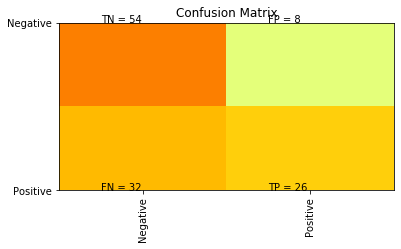

In [10]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, knn_pred)

plt.clf()

plt.imshow(cm, interpolation ='nearest', cmap = plt.cm.Wistia)

classNames = ['Negative','Positive']

ax = plt.gca()
ax.tick_params(axis = 'x', colors = 'black')
ax.tick_params(axis = 'y', colors = 'black')
plt.title('Confusion Matrix', color = 'black')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for x in range(2):
    for y in range(2):
        plt.text(y - 0.25, x, str(s[x][y]) + " = " + str(cm[x][y]))

In [11]:
#Metrics
print(metrics.classification_report(y_test, knn_pred))
#Accuracy
print('Accuracy = ' + str(metrics.accuracy_score(y_test, knn_pred)))

              precision    recall  f1-score   support

          NO       0.63      0.87      0.73        62
         YES       0.76      0.45      0.57        58

    accuracy                           0.67       120
   macro avg       0.70      0.66      0.65       120
weighted avg       0.69      0.67      0.65       120

Accuracy = 0.6666666666666666


___

#### Discussion 
I used the GridsearchCV module to test a range of k-values as well as both uniform and distance weights. Between those 2 parameters, the setup that performed best was k = 8 with a uniform weight. These parameters show an accuracy of ~67% with a 63% precision on the NO class and 76% on the YES class

___

### Problem 2c 
Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and
the Naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and
average accuracy scores for each classifier. For each model, compare the average accuracry scores on
the test and the training data sets. What does the comparison tell you in terms of bias-variance tradeoff?

___

#### Decision Tree

In [12]:
#Random forest model and param grid
dt = DecisionTreeClassifier()
params = {'splitter': ['best', 'random'], 'min_samples_split': [2, 4, 6], 'random_state': [23], 'criterion': ['gini', 'entropy']}

#KNN with gridsearch
dt_model = GridSearchCV(dt, param_grid = params, scoring = 'accuracy')

#Fit model to training set
dt_model.fit(X_train, y_train)

#Predict off test set
dt_pred = dt_model.predict(X_test)

#Best params
print(dt_model.best_params_)

{'criterion': 'entropy', 'min_samples_split': 2, 'random_state': 23, 'splitter': 'best'}


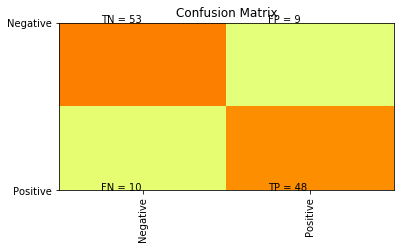

In [13]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, dt_pred)

plt.clf()

plt.imshow(cm, interpolation ='nearest', cmap = plt.cm.Wistia)

classNames = ['Negative','Positive']

ax = plt.gca()
ax.tick_params(axis = 'x', colors = 'black')
ax.tick_params(axis = 'y', colors = 'black')
plt.title('Confusion Matrix', color = 'black')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for x in range(2):
    for y in range(2):
        plt.text(y - 0.25, x, str(s[x][y]) + " = " + str(cm[x][y]))

In [14]:
#Metrics
print(metrics.classification_report(y_test, dt_pred))
#Accuracy
print('Training Accuracy = ' + str(metrics.accuracy_score(y_train, dt_model.predict(X_train))))
print('Test Accuracy = ' + str(metrics.accuracy_score(y_test, dt_pred)))

              precision    recall  f1-score   support

          NO       0.84      0.85      0.85        62
         YES       0.84      0.83      0.83        58

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120

Training Accuracy = 1.0
Test Accuracy = 0.8416666666666667


___

#### Naive-Bayes

In [15]:
#Gausian naive-bayes model and param grid
nb = GaussianNB()
# params = {'n_estimators': [10, 20, 30, 40, 50], 'min_samples_split': [2, 4, 6]}

#Fit model to training set
nb.fit(X_train, y_train)

#Predict off test set
y_pred = nb.predict(X_test)

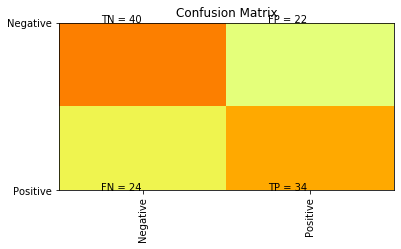

In [16]:
#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

plt.clf()

plt.imshow(cm, interpolation ='nearest', cmap = plt.cm.Wistia)

classNames = ['Negative','Positive']

ax = plt.gca()
ax.tick_params(axis = 'x', colors = 'black')
ax.tick_params(axis = 'y', colors = 'black')
plt.title('Confusion Matrix', color = 'black')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 90)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for x in range(2):
    for y in range(2):
        plt.text(y - 0.25, x, str(s[x][y]) + " = " + str(cm[x][y]))

In [17]:
#Metrics
print(metrics.classification_report(y_test, y_pred))
#Accuracy
print('Training Accuracy = ' + str(metrics.accuracy_score(y_train, nb.predict(X_train))))
print('Test Accuracy = ' + str(metrics.accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

          NO       0.62      0.65      0.63        62
         YES       0.61      0.59      0.60        58

    accuracy                           0.62       120
   macro avg       0.62      0.62      0.62       120
weighted avg       0.62      0.62      0.62       120

Training Accuracy = 0.6708333333333333
Test Accuracy = 0.6166666666666667


___

### Problem 2D 
Discuss your observations based on the above experiments.

Based on the experiments from part C, the Decision Tree Classifier performed the best with 40 estimators and a minimum of 6 samples before each split. The precision score for both classes in the dt model are quite a lot higher than both the gausiannNB and KNN models.

___

# Problem 3 
Data Analysis and Predictive Modeling on Census data Dataset: adult-modified.csv
For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some
of the attributes have been removed and some preprocessing has been performed.

___

### Problem 3a 
Preprocessing and data analysis: 

•Examine the data for missing values. In case of categorical attributes, remove instances with missing
values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean. 

•Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms
illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical
attributes, etc. 

•Perform the following cross-tabulations (including generating bar charts): education+race, workclass+income, work-class+race, and race+income. In the latter case (race+income) also create a table
or chart showing percentages of each race category that fall in the low-income group. Discuss your
observations from this analysis. 

•Compare and contrast the characteristics of the low-income and high-income categories across the
different attributes.

In [18]:
#Import data
url = 'https://raw.githubusercontent.com/PixarJunkie/dsc-478-programming-ml-apps/master/data/adult-data/adult-modified.csv'
data = pd.read_csv(url)
data.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [19]:
#Shape
data.shape

(10000, 8)

In [20]:
#Check categorical columns for nulls
cat_cols = ['workclass', 'marital-status', 'race', 'sex']
for col in cat_cols:
    print(col + 'value counts')
    print(data['%s' %(col)].value_counts())

workclassvalue counts
Private     6947
Public      1317
Self-emp    1148
?            588
Name: workclass, dtype: int64
marital-statusvalue counts
Single     5017
Married    4983
Name: marital-status, dtype: int64
racevalue counts
White          8556
Black           953
Asian           309
Amer-Indian      99
Hispanic         83
Name: race, dtype: int64
sexvalue counts
Male      6703
Female    3297
Name: sex, dtype: int64


In [21]:
#Drop ? from workclass
data = data[data.workclass != '?']
#Check if any more columns contain ?
np.sum(data == '?')

age               189
workclass           0
education           0
marital-status      0
race                0
sex                 0
hours-per-week      0
income              0
dtype: int64

In [22]:
#Convert ? to null
data.age.replace({'?': 0}, inplace = True)
#Convert age to in
data.age = data.age.astype(int)
#Replace 0 with mean
data.age.replace({0: round(np.mean([x for x in data.age if x > 0]), 1)}, inplace = True)

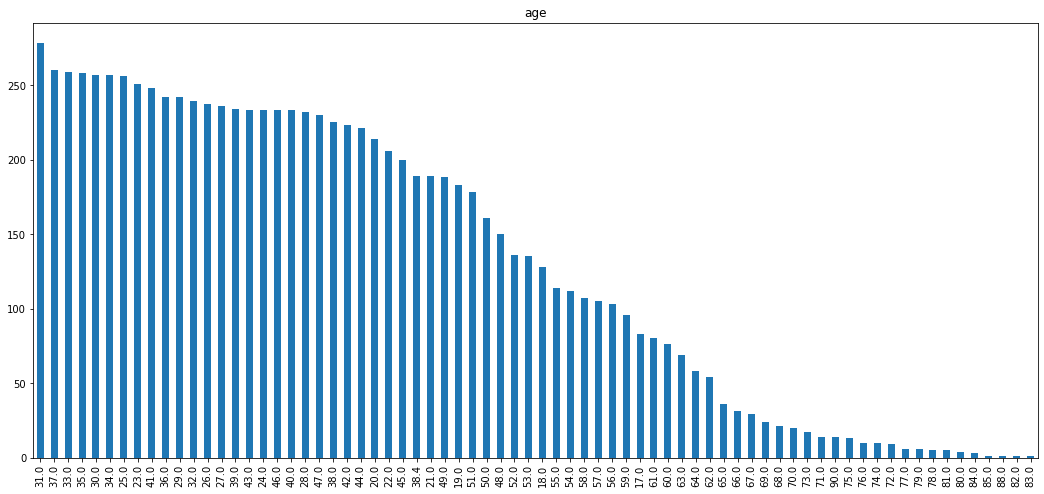

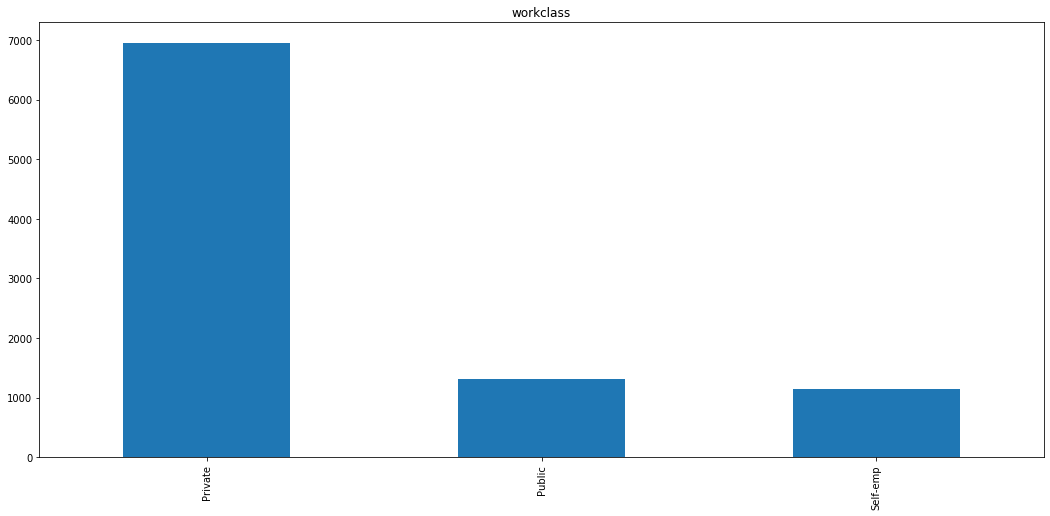

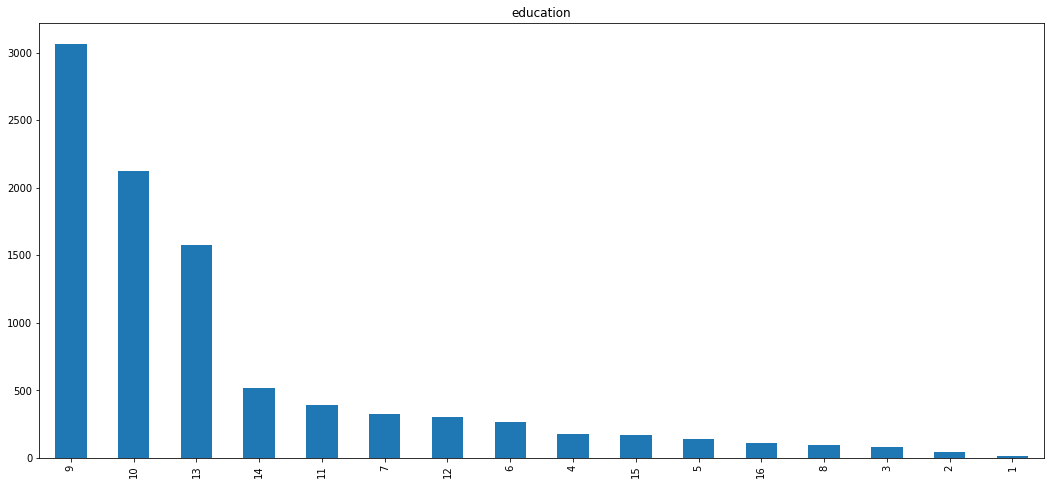

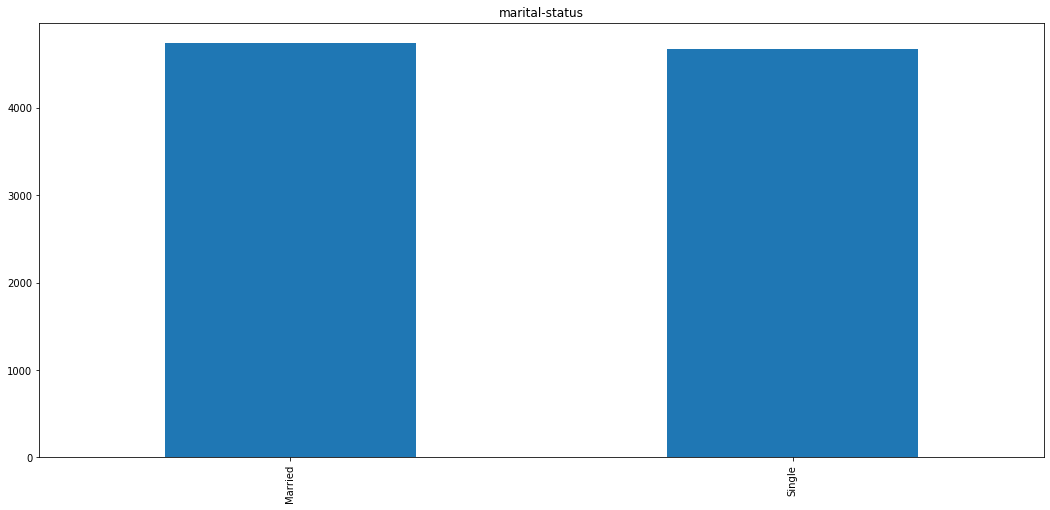

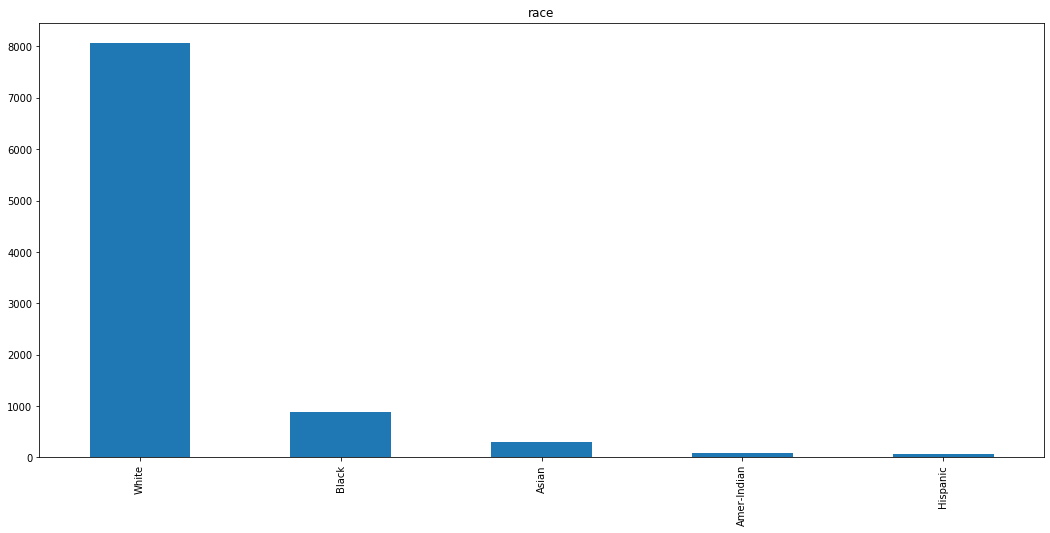

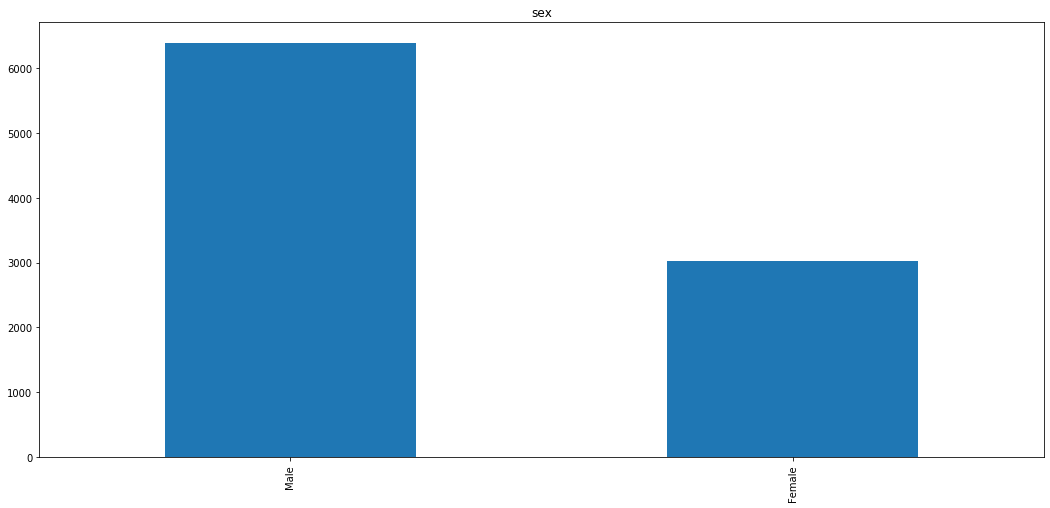

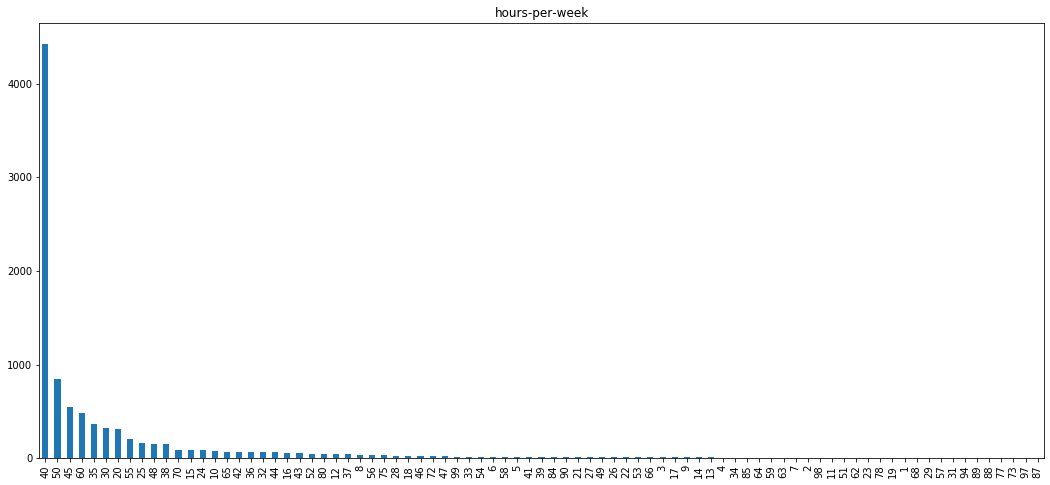

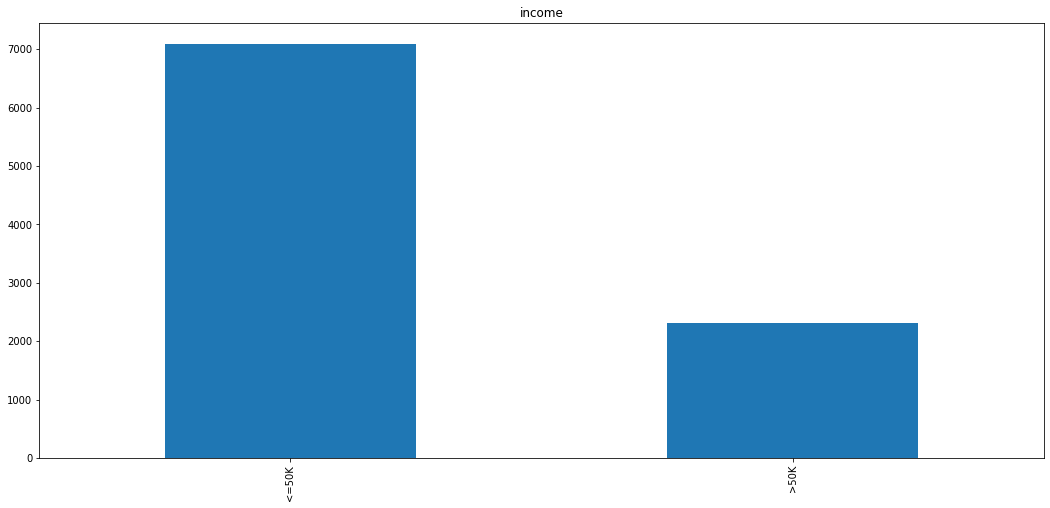

In [23]:
#For each column (except id), plot histogram
cat_df = data[['workclass', 'marital-status', 'race', 'sex']]
for item, col in enumerate(data.columns): 
    data[col].value_counts().plot(kind = 'bar')
    plt.title('%s' %(col))
    fig = plt.gcf()
    fig.set_size_inches(18, 8)
    plt.show()

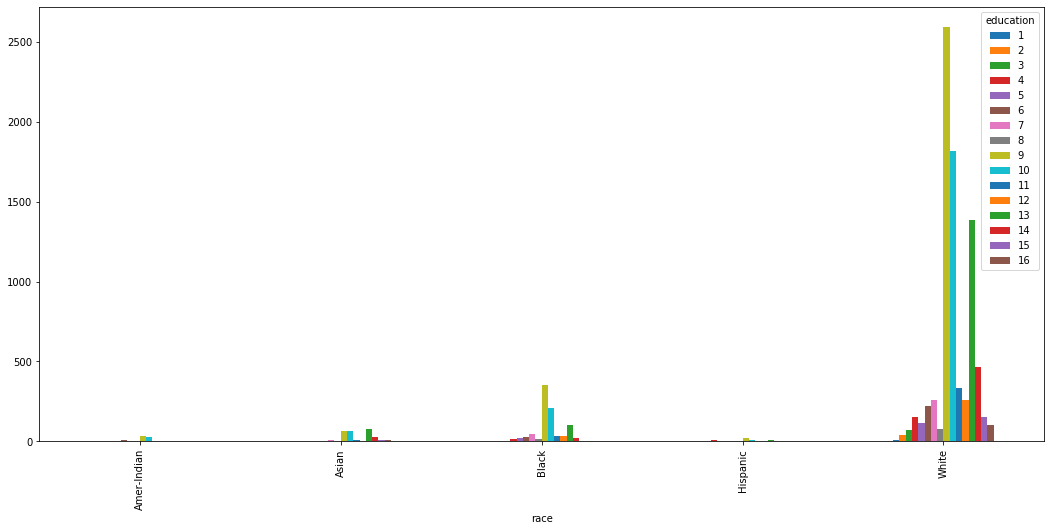

In [24]:
#Education vs. Race
pd.crosstab(data.race, data.education).plot.bar()
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()

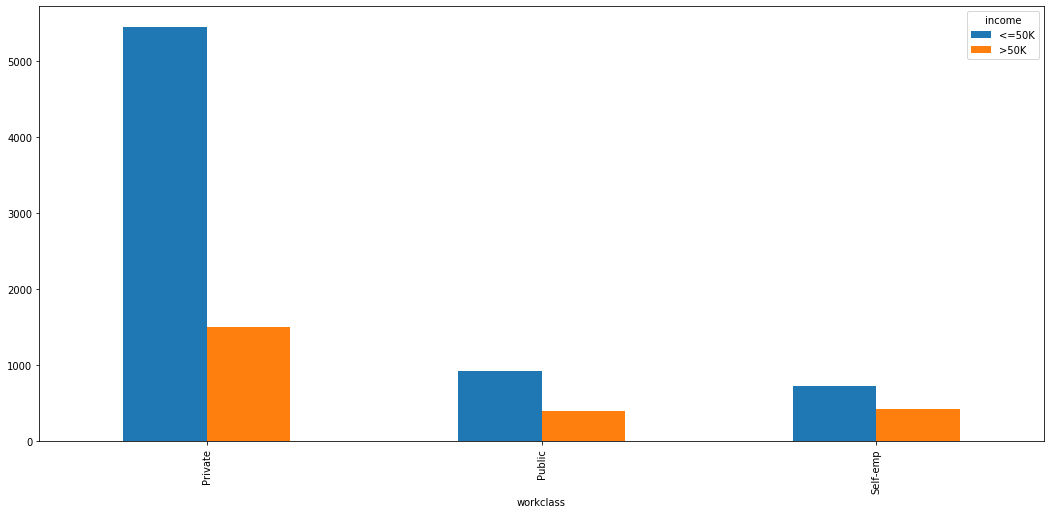

In [25]:
#Workclass vs income
pd.crosstab(data.workclass, data.income).plot.bar()
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()

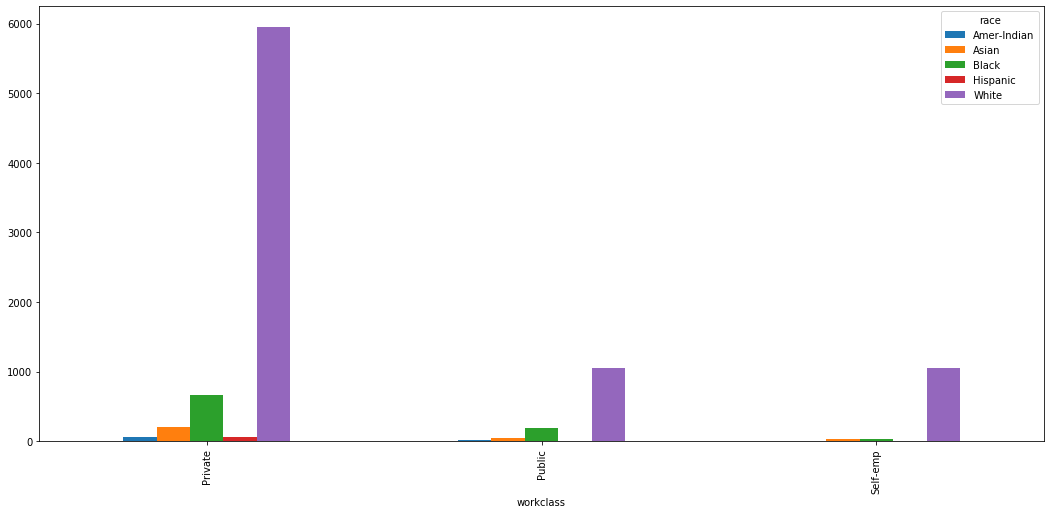

In [26]:
#Workclass vs Race
pd.crosstab(data.workclass, data.race).plot.bar()
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()

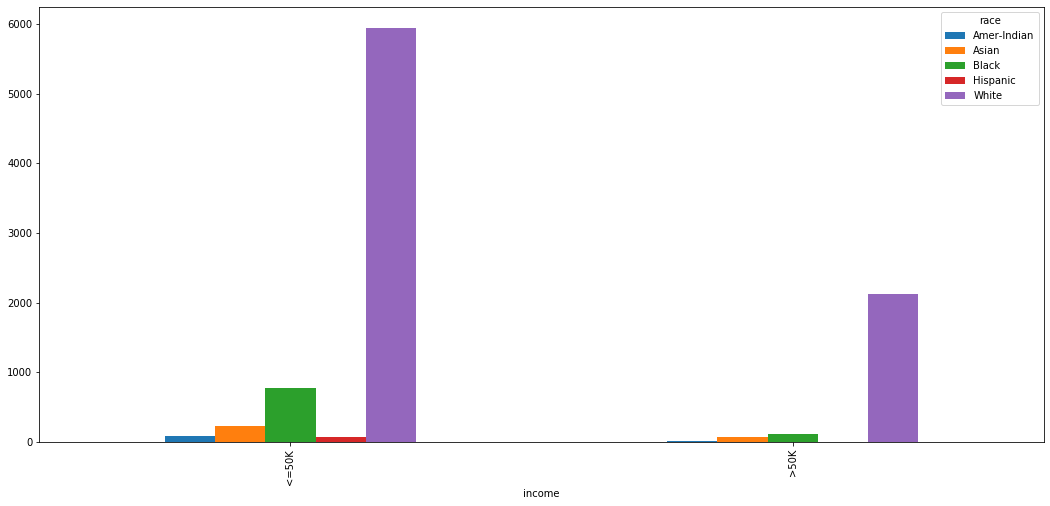

In [27]:
#Workclass vs Race
pd.crosstab(data.income, data.race).plot.bar()
fig = plt.gcf()
fig.set_size_inches(18, 8)
plt.show()

### Discussion 
A few things that I noticed from looking at these charts:
- The most years of education are from the White ethnic group while the least is from the Hispanic group
- The majority of all workers are in the private sector
- Of those working in the private sector, the majority make > 50K (The majority across all working classes > 50K)
- The working force is predominately White, with African American being the next largest group

___

### Problem 3b 
Predictive Modeling and Model Evaluation: 

•Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then
separate the target attribute ("income_>50K") from the attributes used for training. Note: you need to
drop "income_<=50K" which is also created as a dummy variable in earlier steps). 

•Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as
selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold crossvalidation (using cross-validation module in scikit-learn) and report the overall average accuracy. 

•For the decision tree model (generated on the full training data), generate a visualization of tree and
submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook.

In [28]:
#Create dummies
data_dummies = pd.get_dummies(data[['workclass', 'marital-status', 'race', 'sex', 'income']])
data_combined = pd.concat([data, data_dummies], axis = 1)
#Create y variable
y = data_combined['income_>50K']
#Drop old columns
data_combined.drop(['workclass', 'race', 'sex', 'marital-status', 'income', 'income_<=50K', 'income_>50K'], axis = 1, inplace = True)

In [29]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(data_combined, y, test_size = 0.30, random_state = 23)

In [32]:
#Classifiers 
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
dt = DecisionTreeClassifier(criterion = 'entropy')
dt_model = dt.fit(X_train, y_train)
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)

#CV
nb_cv = cross_val_score(nb_model, X_train, y_train, cv = 10)
dt_cv = cross_val_score(dt_model, X_train, y_train, cv = 10)
lda_cv = cross_val_score(lda_model, X_train, y_train, cv = 10) 

#Overall average accuracy
overall_avg_acc = np.mean([nb_cv.mean(), dt_cv.mean(), lda_cv.mean()])
print('Overall average accuracy:  + {} (+/- {})'.format(nb_cv.mean(), nb_cv.std()*2))

Overall average accuracy:  + 0.713104909275122 (+/- 0.02575478094102494)


In [37]:
#Decision tree viz
export_graphviz(dt_model, out_file = 'tree.dot', feature_names = X_train.columns)

#Convert tree.dot to tree.png
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')